### `**MNist dataset**
mnist dataset 소개: https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset

Numpy를 활용한 dataset 핸들링: Yann Lecun 교수가 90년대 초반에 만들었던 Neural Net이였던 LeNet에 사용되었던 dataset. 0에서 9까지의 사람손글씨 데이터셋. 관련 영상: https://www.youtube.com/watch?v=FwFduRA_L6Q 

dataset은 yann.lcun.com에서 다운로드 가능: http://yann.lecun.com/exdb/mnist/

In [3]:
import numpy as np
from urllib import request # urllib.request는 URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import gzip # .gz파일의 압축을 해제하지 않고 바로 열어볼 수 있는 모듈 제공

In [4]:
filename = [['x_train', 'train-images-idx3-ubyte.gz'], 
            ['x_test', 't10k-images-idx3-ubyte.gz'],
            ['y_train', 'train-labels-idx1-ubyte.gz'],
            ['y_test', 't10k-labels-idx1-ubyte.gz']]   # 길이가 4인 리스트 생성

base_url = 'http://yann.lecun.com/exdb/mnist/'

print(filename)
print(len(filename))
print(type(filename))

for n in filename:
  print(base_url+n[1])

[['x_train', 'train-images-idx3-ubyte.gz'], ['x_test', 't10k-images-idx3-ubyte.gz'], ['y_train', 'train-labels-idx1-ubyte.gz'], ['y_test', 't10k-labels-idx1-ubyte.gz']]
4
<class 'list'>
http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz


In [5]:
# filename list에서 하나씩 file 이름 호출
for n in filename:
  request.urlretrieve(base_url+n[1], n[1]) # request.urlretrieve(url주소, 로컬에 저장될 파일이름): URL로 표시된 네트워크 객체(URL 주소의 문서)를 로컬 파일로 저장, 즉 직접 다운로드가 가능함
  print('%s downloaded' % base_url+n[1])

print('download has been completed.')

http://yann.lecun.com/exdb/mnist/ downloadedtrain-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloadedt10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloadedtrain-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloadedt10k-labels-idx1-ubyte.gz
download has been completed.


In [6]:
# dictionary에 'x_train', 'y_train', 'x_test', 'y_test'라는 key로 저장
mnist = {}

# train, test image를 가져와서 dictionary에 x_train, y_train에 input
for name in filename[:2]:  # train set 만 호출
  with gzip.open(name[1], 'rb') as f:   #gz 파일을 읽어와 f에 저장. 첫 번째 인수는 가져올 파일명, 뒤에는 모드 인자로, 'rb'가 디폴트.
    mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)   # frombuffer(raw data, dtype, ): bytes(raw data)에서 array로 값을 얻고 싶을 때 쓰는 함수. 원하는 차원이나 크기를 맞추기 위해 reshape 필요
    # f.read(): 파일의 내용 전체를 문자열로 돌려줌. 즉 파일 전체 내용을 받음.
    # 위 코드에서 offset=16의 의미는?
    # reshape(-1, 28, 28)에서 -1의 의미: 열과 깊이가 지정된 차원으로 배정이 될 수 있도록 행의 차원을 추정하라는 것. https://rfriend.tistory.com/345 참고.

for name in filename[2:]:
  with gzip.open(name[1], 'rb') as f:
    mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8).reshape(-1,1) # offset=8이 무엇을 뜻하는지??

In [5]:
# training data, label의 shape 확인
print(mnist['x_train'].shape)
print(mnist['y_train'].shape)

(60000, 28, 28)
(60000, 1)


In [6]:
# test data, label의 shape 확인
print(mnist['x_test'].shape)
print(mnist['y_test'].shape)

(10000, 28, 28)
(10000, 1)


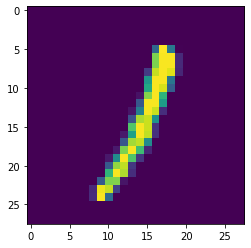

In [7]:
# dataset 확인
import matplotlib.pyplot as plt

# 100번째 index에 들어있는 데이터 출력
img = mnist['x_train'][99, :]
plt.imshow(img)
plt.show()

In [7]:
# 28x28 pixel로 된 것을 확인. 이 숫자가 나타나는 번호가 맞는지 label로 확인
print(mnist['y_train'][99])

[1]


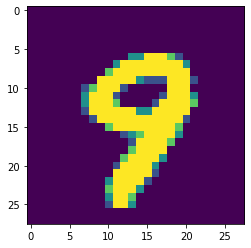

In [9]:
# 1이라는 것이 확인됨. 이번엔 6000번째 데이터의 숫자를 출력해보자
img = mnist['x_train'][5999]
plt.imshow(img)
plt.show()

In [10]:
# 6000번째 숫자에 대한 label 확인
print(mnist['y_train'][5999])

[9]


### **연습문제**

In [9]:
x_train, y_train, x_test, y_test = mnist['x_train'], mnist['y_train'], mnist['x_test'], mnist['y_test'] # dictionary의 값들을 tuple로 전환??

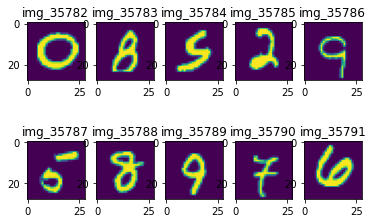

In [12]:
# 연습문제 1. (pyplot)
# x_train data 로부터 i 번째에서부터 시작하는 이미지를 10 개를 동시에 출력해 봅시다.

def draw_10_images(i):
    images = x_train[i:i+10]

    idx=1
    for img in images:
      plt.subplot(2,5,idx)
      plt.imshow(img)
      plt.title('img_%d' % i)
      idx += 1
      i += 1
    
    plt.show()

draw_10_images(35782)

In [18]:
# 연습문제 2. x_train 에서 각각의 0, 1, 2, ..., 9 각각의 데이터셋은 몇개씩이나 있을까요?


# iterative (반복하는 방식)
cum=0
for i in range(10):
  mask = ( y_train == i )
  count_i = len(y_train[mask])
  cum += count_i
  print('%d : %d 개' % (i, count_i))

print(cum)

# vectorized 방식 

for i in range(10):
    print("%d : %d" % (i,np.sum( y_train == i )))

np.sum(y_train > 5 )

0 : 5923 개
1 : 6742 개
2 : 5958 개
3 : 6131 개
4 : 5842 개
5 : 5421 개
6 : 5918 개
7 : 6265 개
8 : 5851 개
9 : 5949 개
60000
0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


23983

In [36]:
a = np.arange(0,1000)
print(a.shape)

mask = ( a > 100) & ( a < 500)

b = a[mask]

print(b.shape)
print(b)



(1000,)
(399,)
[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343

In [37]:
# 연습문제 3. 0~9 까지를 분류하는 multi-class classification은 pytorch를 이용해서 매우 손쉽게 풀어볼 예정이구요. 학습을 위해서 0,1 숫자 두개는 특별히 분류해서 numpy를 이용해서 직접 logistic regression을 돌려볼려고 합니다.

# 0,1 만 존재하는 x_train, y_train, x_test, y_test를 만들어 보도록 합시다. 

# Hint
a = np.random.random(1000000)
a = a.reshape(100,1)   # rank-1 row array 에서 column array 로 변환
# (100,) ==> (100,1)
print(a)

mask = a < 0.4  #  a array 에서 0.4 보다 작은 원소만 뽑아서 mask array 를 만듬
print(mask) # boolean 형태의 array

c = a[mask]
c = c.reshape(-1,1)
print(c.shape, len(c))
print(c)

# 위의 예제를 보시면 y_train 에서 0,1 을 뽑는 것 가능하겠죠?  y_train 에서 얻은 mask를 이용해서 x_train 을 얻는 것은 조금 복잡합니다 :)

[[0.86802297]
 [0.8791198 ]
 [0.46333831]
 [0.56587192]
 [0.70457721]
 [0.70815023]
 [0.07624274]
 [0.58926812]
 [0.4337733 ]
 [0.81496253]
 [0.17951562]
 [0.19422896]
 [0.42602806]
 [0.81571428]
 [0.13800803]
 [0.36460087]
 [0.07094081]
 [0.90964287]
 [0.37242218]
 [0.46290971]
 [0.11027225]
 [0.76565414]
 [0.32019707]
 [0.49276904]
 [0.56534483]
 [0.06196224]
 [0.96795496]
 [0.41927954]
 [0.79213004]
 [0.96694202]
 [0.79744209]
 [0.26477339]
 [0.3154839 ]
 [0.9280662 ]
 [0.42280905]
 [0.65602417]
 [0.87320323]
 [0.64278527]
 [0.67463804]
 [0.27976842]
 [0.18467321]
 [0.15332578]
 [0.31279325]
 [0.33134337]
 [0.56339256]
 [0.96256302]
 [0.97065072]
 [0.65989539]
 [0.03687039]
 [0.27875652]
 [0.17034415]
 [0.03049663]
 [0.18319428]
 [0.64463193]
 [0.58942409]
 [0.5867503 ]
 [0.56170442]
 [0.35904592]
 [0.68131466]
 [0.42707539]
 [0.17479957]
 [0.51556207]
 [0.55299571]
 [0.29163776]
 [0.47077705]
 [0.86148027]
 [0.00474909]
 [0.46938802]
 [0.32241757]
 [0.9180155 ]
 [0.70819045]
 [0.20

In [15]:
train_bool = ([y_train < 2])[0]
print(train_bool)

y01_train = y_train[y_train < 2].reshape(-1,1)
print(y01_train.shape, len(y01_train))
print(y01_train)


[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [False]]
(12665, 1) 12665
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [49]:


x_train, y_train, x_test, y_test 

# label 이 0, 1 인 dataset 만 추출을 해보자. 
# y_train = [[0], [1], [7], ... [9]]

# mask = ( y_train == 0 ) + (y_train ==1 )
mask = y_train < 2

print(np.sum(mask)) #  0, 1 인 element 의 갯수
print(mask.shape)

y_train_01 = y_train[mask]
print(len(y_train_01))
# x_train_01 = x_train[mask]    # x_train shape 은 (60000,[ 28,28 ])
#                                                  12665 만 꺼내야 되거든요.

print(mask)
print(mask.T[0])
x_train_01 = x_train[mask.T[0],:]



12665
(60000, 1)
12665
[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [False]]
[False  True False ... False False False]


x01_train의 길이: 12665, y01_train의 길이: 12665


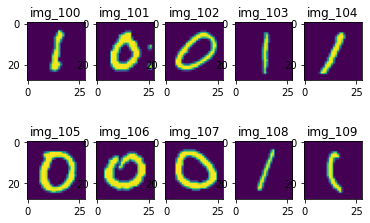

In [16]:
# 0,1 train set 추출
train_bool = np.array([y_train < 2])[0]

x01_train = []
y01_train = []

for idx, y in enumerate(train_bool):
  if y == True:
    x01_train.append(x_train[idx])
    y01_train.append(y_train[idx])

print('x01_train의 길이: %d, y01_train의 길이: %d' % (len(x01_train), len(y01_train)))

x01_train_array = np.array(x01_train).reshape(-1, 28, 28)
y01_train_array = np.array(y01_train).reshape(-1,1)


# 검증
def draw_10_images(i):
    images = x01_train_array[i:i+10]

    idx=1
    for img in images:
      plt.subplot(2,5,idx)
      plt.imshow(img)
      plt.title('img_%d' % i)
      idx += 1
      i += 1
    
    plt.show()

draw_10_images(100)

Test bool
[[False]
 [False]
 [ True]
 ...
 [False]
 [False]
 [False]]
x01_test의 길이: 2115, y01_test의 길이: 2115


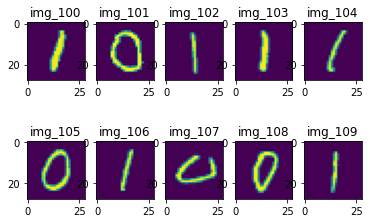

In [19]:
# 0,1 test set 추출
# test_bool = np.array([y_test < 2])[0]
test_bool = y_test < 2
print("Test bool")
print(test_bool)

x01_test = []
y01_test = []

for idx, y in enumerate(test_bool):
  if y == True:
    x01_test.append(x_test[idx])
    y01_test.append(y_test[idx])

print('x01_test의 길이: %d, y01_test의 길이: %d' % (len(x01_test), len(y01_test)))

x01_test_array = np.array(x01_test).reshape(-1, 28, 28)
y01_test_array = np.array(y01_test).reshape(-1,1)


# 검증
def draw_10_images(i):
    images = x01_test_array[i:i+10]

    idx=1
    for img in images:
      plt.subplot(2,5,idx)
      plt.imshow(img)
      plt.title('img_%d' % i)
      idx += 1
      i += 1
    
    plt.show()

draw_10_images(100)